# Importing required packages for pre-processing

In [1]:
from pathlib import Path # to interact with file system.
import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).
import statsmodels.api as sm



from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


from dmba import classificationSummary, gainsChart, liftChart
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import plotDecisionTree

from mord import LogisticIT



%matplotlib inline   
import matplotlib.pylab as plt

# Import Data

In [63]:
# Uploading the dataset

bank_df = pd.read_csv('Bank dataset.csv')

In [64]:
# Droppina Nan's in the dataset

bank_df = bank_df.dropna()
print(bank_df.head())

   age          job  marital          education default housing loan  \
0   30  blue-collar  married           basic.9y      no     yes   no   
1   39     services   single        high.school      no      no   no   
2   25     services  married        high.school      no     yes   no   
4   47       admin.  married  university.degree      no     yes   no   
5   32     services   single  university.degree      no      no   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   
5   cellular   sep         thu  ...         3    999         2      failure   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0         -1.8  

In [65]:
# Dropping 'default' colummn

bank_df = bank_df.drop(['default'], axis=1)
print(bank_df.head())

   age          job  marital          education housing loan    contact month  \
0   30  blue-collar  married           basic.9y     yes   no   cellular   may   
1   39     services   single        high.school      no   no  telephone   may   
2   25     services  married        high.school     yes   no  telephone   jun   
4   47       admin.  married  university.degree     yes   no   cellular   nov   
5   32     services   single  university.degree      no   no   cellular   sep   

  day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0         fri       487         2    999         0  nonexistent          -1.8   
1         fri       346         4    999         0  nonexistent           1.1   
2         wed       227         1    999         0  nonexistent           1.4   
4         mon        58         1    999         0  nonexistent          -0.1   
5         thu       128         3    999         2      failure          -1.1   

   cons.price.idx  cons.co

In [66]:
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Data Preprocessing

In [67]:
# Converting column 'job' to category and there by havin them as int

bank_df['job'] = bank_df['job'].astype('category')

# Listing the categories in the now category variable
bank_df['job'].cat.categories


Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'],
      dtype='object')

In [68]:
# Replacing categories with numeric form.

bank_df['job'].replace(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)

In [69]:
# Converting column 'marital' to category and there by havin them as int

bank_df['marital'] = bank_df['marital'].astype('category')

# Listing the categories in the now category variable
bank_df['marital'].cat.categories

Index(['divorced', 'married', 'single'], dtype='object')

In [70]:
# Replacing categories with numeric form.

bank_df['marital'].replace(['divorced', 'married', 'single'], [1, 2, 3], inplace=True)

In [71]:
# Converting column 'education' to category and there by havin them as int

bank_df['education'] = bank_df['education'].astype('category')

# Listing the categories in the now category variable
bank_df['education'].cat.categories

Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree'],
      dtype='object')

In [72]:
# Replacing categories with numeric form.

bank_df['education'].replace(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree'], [1, 2, 3, 4, 5, 6, 7], inplace=True)

In [73]:
# Converting column 'month' to category and there by havin them as int

bank_df['month'] = bank_df['month'].astype('category')

# Listing the categories in the now category variable
bank_df['month'].cat.categories

Index(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'], dtype='object')

In [74]:
# Replacing categories with numeric form.

bank_df['month'].replace(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], 
                         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], inplace=True)

In [75]:
# Converting column 'day_of_week' to category and there by havin them as int

bank_df['day_of_week'] = bank_df['day_of_week'].astype('category')

# Listing the categories in the now category variable
bank_df['day_of_week'].cat.categories

Index(['fri', 'mon', 'thu', 'tue', 'wed'], dtype='object')

In [76]:
# Replacing categories with numeric form.

bank_df['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], 
                         [1, 2, 3, 4, 5], inplace=True)

In [77]:
# Converting column 'pdays' to category and replace tem as 0s and 1s.
# 999's to be relapced by 0  - means that the client has not been contacted since the previous campaign
# The rest no.s replaced by 1 - means that the client has been contacted since the previous campaign
bank_df['pdays'] = bank_df['pdays'].astype('category')

# Listing the categories in the now category variable
bank_df['pdays'].cat.categories

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 18, 19, 21,
            999],
           dtype='int64')

In [78]:
# Replacing categories with numeric form.

bank_df['pdays'].replace([0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 15, 16, 18, 19, 21,
            999], 
                         [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0], inplace=True)

In [79]:
# Converting remaining object variables to category and there by having them as dummy variables

bank_df['housing'] = bank_df['housing'].astype('category')
#bank_df['housing'] = bank_df['housing'].astype('category')
#bank_df['housing'] = bank_df['housing'].astype('category')


# The target variable need sto remain as categorical hence retaining it the same
bank1_df = bank_df.iloc[:,0:19]

# Creating dummy variable
bank1_df = pd.get_dummies(bank1_df, prefix_sep='_', drop_first=True)

# Concatenating bank_1 df with outcome column
bank_df = pd.concat([bank1_df.iloc[:,:], 
           bank_df.iloc[:,19:20]], axis=1)

In [61]:
bank_df.dtypes

age                       int64
job                       int64
marital                   int64
education                 int64
month                     int64
day_of_week               int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
housing_yes               uint8
loan_yes                  uint8
contact_telephone         uint8
poutcome_nonexistent      uint8
poutcome_success          uint8
y                        object
dtype: object

In [80]:
print(bank_df.head())

   age  job  marital  education  month  day_of_week  duration  campaign  \
0   30    2        2          3      3            5       487         2   
1   39    8        3          4      3            5       346         4   
2   25    8        2          4      4            3       227         1   
4   47    1        2          7      9            1        58         1   
5   32    8        3          7      7            4       128         3   

   pdays  previous  ...  cons.price.idx  cons.conf.idx  euribor3m  \
0      0         0  ...          92.893          -46.2      1.313   
1      0         0  ...          93.994          -36.4      4.855   
2      0         0  ...          94.465          -41.8      4.962   
4      0         0  ...          93.200          -42.0      4.191   
5      0         2  ...          94.199          -37.5      0.884   

   nr.employed  housing_yes  loan_yes  contact_telephone  \
0       5099.1            1         0                  0   
1       5191.0

# Train/Validation Split

In [81]:
bank_classification_df = bank_df

# Developing predictors X and output variable Y for the data set.
X = bank_classification_df.drop(columns=['y'])
y = bank_classification_df['y']

# Developing training (60%) and validation(40% or 0.4) partitions for
# Banking Dataset data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Classification

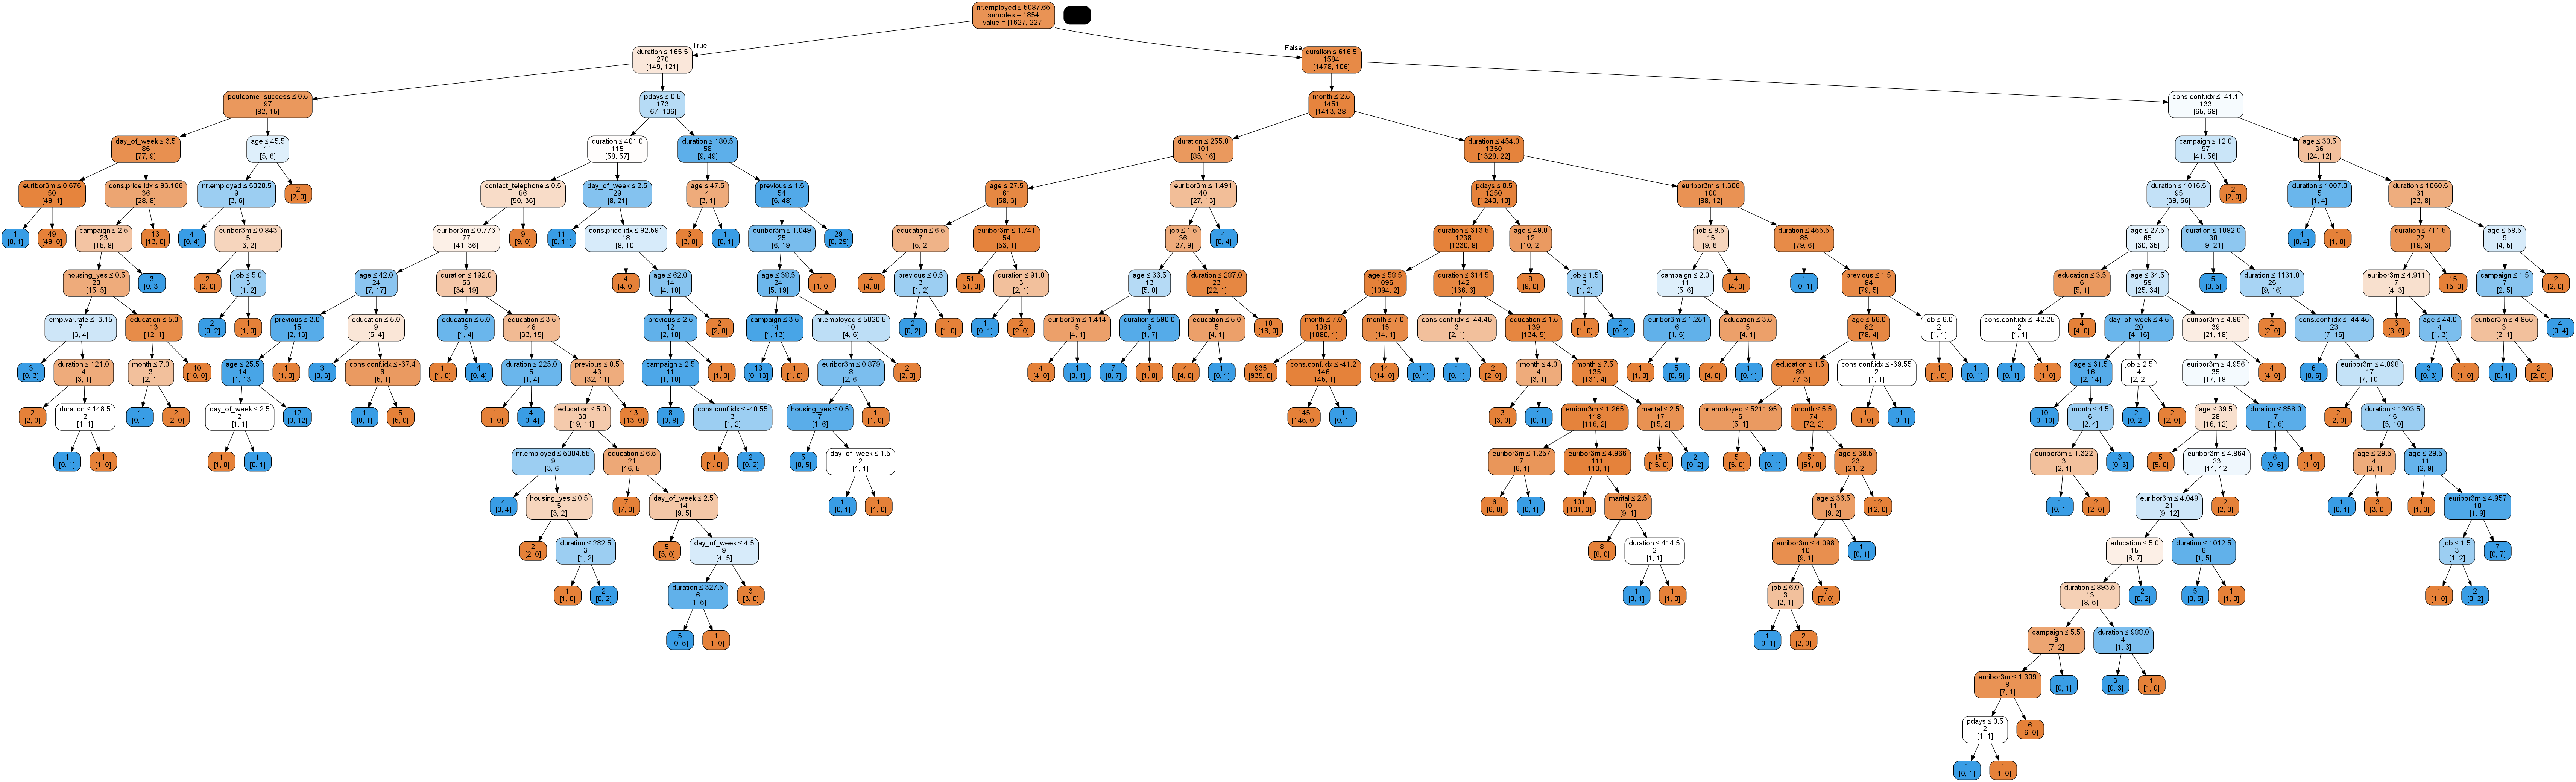

In [82]:
# Generating a full classification tree using training partition.
fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

# Using plotDecisionTree() to visualize the full tree.
plotDecisionTree(fullClassTree, feature_names=train_X.columns)

In [83]:
# Confusion matrices for full classification tree. 

# Identifying  and displaying confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, fullClassTree.predict(train_X))

# Identifying  and displaying confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1627    0
     1    0  227

Validation Partition
Confusion Matrix (Accuracy 0.8689)

       Prediction
Actual    0    1
     0 1010   83
     1   79   64


In [84]:
# GRID SEARCH

# Starting with initial guess for parameters.
param_grid = {
    'max_depth': [10, 20, 30, 40],  
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
    'min_samples_split': [20, 40, 60, 80, 100],
}

# Using GridSearchCV() fucntion for various combinations of DecisionTreeClassifier() initial parameters. 
gridSearch_init = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid, cv=5, n_jobs=-1)
gridSearch_init.fit(train_X, train_y)

# Displaying best initial paramenters of classification tree. 
print(f'Initial score:{gridSearch_init.best_score_:.4f}')
print('Initial parameters: ', gridSearch_init.best_params_)

Initial score:0.8959
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 80}


In [85]:
# Improving grid search parameters by adapting grid based on results from initial grid search parameters.
param_grid = {
    'max_depth': list(range(2, 20)),  
    'min_impurity_decrease': [0.0005, 0.001,0.005], 
    'min_samples_split': list(range(20, 100)),
}

# Applying GridSearchCV() fucntion for various combinations of DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Displaying best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8970
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}


Best Classification Tree with Grid Search


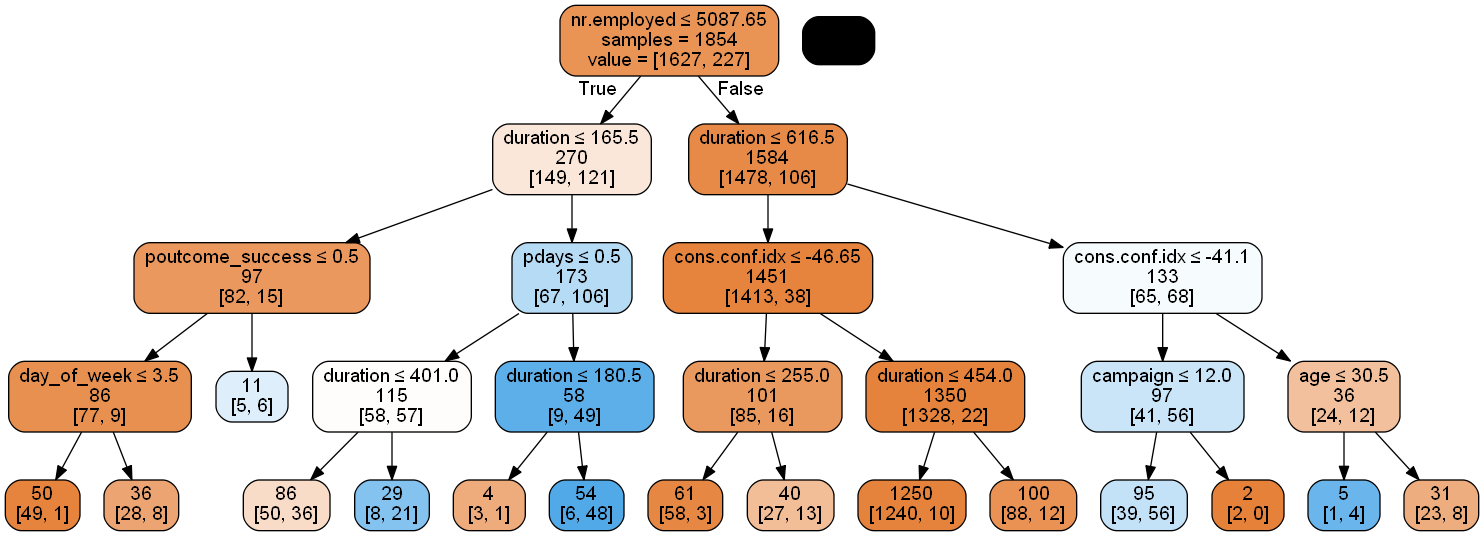

In [86]:
# Creating classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Displaying classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [87]:
# Confusion matrices for grid search classification tree. 

# Identifying and displaying confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identifying and displaying confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9186)

       Prediction
Actual    0    1
     0 1568   59
     1   92  135

Validation Partition
Confusion Matrix (Accuracy 0.8908)

       Prediction
Actual    0    1
     0 1041   52
     1   83   60


# Logistic Regression

In [97]:
bank_logreg_df = bank_df

In [98]:
# Converting outcome variable y to binary variable for running logistic regression
bank_logreg_df['y'] = bank_logreg_df['y'].astype('category')
bank_logreg_df['y'].cat.categories
bank_logreg_df['y'] = pd.get_dummies(bank_logreg_df['y'], prefix_sep='_', drop_first=True)

In [99]:
bank_logreg_df.dtypes

age                       int64
job                       int64
marital                   int64
education                 int64
month                     int64
day_of_week               int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
housing_yes               uint8
loan_yes                  uint8
contact_telephone         uint8
poutcome_nonexistent      uint8
poutcome_success          uint8
y                         uint8
dtype: object

In [100]:
# Determining predictors X and outcome y variables.
X = bank_logreg_df.drop(columns=['y'])
y = bank_logreg_df['y']

# Partitioning data into training (60% or 0.6) and validation(40% or 0.4) of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. 
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Showing intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -0.001
Coefficients for Predictors
          age    job  marital  education  month  day_of_week  duration  \
Coeff: -0.011  0.021    0.108      0.011 -0.066       -0.005     0.004   

        campaign  pdays  previous  emp.var.rate  cons.price.idx  \
Coeff:    -0.054   0.97     0.127        -0.279           0.525   

        cons.conf.idx  euribor3m  nr.employed  housing_yes  loan_yes  \
Coeff:          0.071      0.029        -0.01       -0.049     0.067   

        contact_telephone  poutcome_nonexistent  poutcome_success  
Coeff:             -1.087                 0.456             1.025  


In [101]:
# Making predictions for validation set using multiple predictors logistic regression model. 

# Predicting multiple predictors logistic model's results (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predicting multiple predictors logistic model's probabilities p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Creating data frame to show multiple predictors logistic model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
134        0               0  0.5369  0.4631
447        0               0  0.9944  0.0056
494        1               1  0.0904  0.9096
17         0               0  0.9976  0.0024
3097       1               0  0.8287  0.1713
3010       0               0  0.9952  0.0048
820        0               0  0.9872  0.0128
2163       0               0  0.9892  0.0108
1981       1               0  0.9415  0.0585
2174       0               0  0.9895  0.0105
3057       0               0  0.9887  0.0113
2041       0               1  0.2282  0.7718
2568       0               0  0.9947  0.0053
1859       1               1  0.3330  0.6670
763        0               0  0.5850  0.4150
61         0               0  0.9326  0.0674
1345       0               0  0.9637  0.0363
8          0               0  0.9901  0.0099
2513       1               0  0.6222  0.3778
667        0               0  0.9856  0.0144


In [102]:
# Confusion matrices for multiple predictors logistic model. 

# Identifying and displaying confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identifying and displaying confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.9121)

       Prediction
Actual    0    1
     0 1585   42
     1  121  106

Validation Partition
Confusion Matrix (Accuracy 0.9070)

       Prediction
Actual    0    1
     0 1064   29
     1   86   57


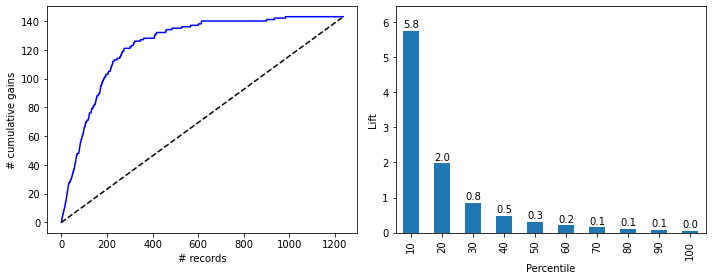

In [103]:
# Developing and displaying Gains chart and Lift chart. 

# Creating a new df data frame from logit_result data frame that is sorted by p(1) in descending order.  
df = log_result.sort_values(by=['p(1)'], ascending=False)

# Creating a data plot with two plots (ncols=2) back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Using gainsChart() function, create Gains chart. 
gainsChart(df.Actual, ax=axes[0], color='Blue')

# Using liftChart() function, create decile-wise Lift chart. 
liftChart(df['p(1)'], title=False, ax=axes[1])
 
# Display the charts. 
plt.tight_layout()
plt.show()

# Forward Selection

In [104]:
X = bank_logreg_df.drop(columns=['y'])
y = bank_logreg_df['y']

# Partitioning data into training (60% or 0.6) and validation(40% or 0.4) of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Defining train_model() function used in Forward Selection
# algorithm with forward_selection() function. 
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LogisticRegression(max_iter=3000)
    model.fit(train_X[variables], train_y)
    return model

# Defining score_model() function used in Forward Selection
# algorithm with forward_selection() function. 
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Using forward_selection() function to identify the
# best_model and best_variables.
best_model_fs, best_variables_fs = forward_selection(train_X.columns, 
                    train_model, score_model, verbose=True)

# Displaying best variables based on Forward Selection algorithm.
print()
print('Best Variables from Forward Selection Algorithm')
print(best_variables_fs)

Variables: age, job, marital, education, month, day_of_week, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, housing_yes, loan_yes, contact_telephone, poutcome_nonexistent, poutcome_success
Start: score=1129.60, constant
Step: score=1101.51, add poutcome_success
Step: score=994.43, add duration
Step: score=912.47, add euribor3m
Step: score=848.53, add previous
Step: score=804.65, add cons.conf.idx
Step: score=793.51, add month
Step: score=793.51, add None

Best Variables from Forward Selection Algorithm
['poutcome_success', 'duration', 'euribor3m', 'previous', 'cons.conf.idx', 'month']


In [105]:
# Developing the multiple logistic regression model based
# on the Forward Selection results.

# Identifying predictors and outcome of the regression model.
predictors = ['poutcome_success', 'duration', 'euribor3m', 'previous', 'cons.conf.idx', 'month']
outcome = 'y'

# Identifying X and y variables for regression and partition data
# using 60% of records for training and 40% for validation 
# (test_size=0.4). 
X = bank_logreg_df[predictors]
y = bank_logreg_df[outcome]
train_X_fs, valid_X_fs, train_y_fs, valid_y_fs = \
          train_test_split(X, y, test_size=0.4, random_state=1)

log_reg_fs = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg_fs.fit(train_X_fs, train_y_fs)


print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg_fs.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg_fs.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())


Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: -0.022
Coefficients for Predictors
        poutcome_success  duration  euribor3m  previous  cons.conf.idx  month
Coeff:              1.88     0.004     -0.619     0.174          0.055  0.041


In [106]:
log_pred_fs = log_reg_fs.predict(valid_X_fs)
log_prob_fs = np.round(log_reg_fs.predict_proba(valid_X_fs), decimals=4)
log_result_fs = pd.DataFrame({'Actual': valid_y_fs, 
                    'Classification': log_pred_fs,
                    'p(0)': [p[0] for p in log_prob_fs],
                    'p(1)': [p[1] for p in log_prob_fs]
})

print('Classification for Validation Partition')
print(log_result_fs.head(20))

Classification for Validation Partition
      Actual  Classification    p(0)    p(1)
134        0               0  0.6111  0.3889
447        0               0  0.9922  0.0078
494        1               1  0.0809  0.9191
17         0               0  0.9932  0.0068
3097       1               0  0.6778  0.3222
3010       0               0  0.9941  0.0059
820        0               0  0.9919  0.0081
2163       0               0  0.9920  0.0080
1981       1               0  0.9609  0.0391
2174       0               0  0.9932  0.0068
3057       0               0  0.9886  0.0114
2041       0               1  0.2456  0.7544
2568       0               0  0.9927  0.0073
1859       1               1  0.2518  0.7482
763        0               1  0.4198  0.5802
61         0               0  0.9139  0.0861
1345       0               0  0.9654  0.0346
8          0               0  0.9831  0.0169
2513       1               0  0.5383  0.4617
667        0               0  0.9725  0.0275


In [107]:
# Confusion matrices for logistic model with forward selection predictors. 

# Identifying and displaying confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg_fs.predict(train_X_fs))

# Identifying and displaying confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg_fs.predict(valid_X_fs))

Training Partition
Confusion Matrix (Accuracy 0.9099)

       Prediction
Actual    0    1
     0 1587   40
     1  127  100

Validation Partition
Confusion Matrix (Accuracy 0.9005)

       Prediction
Actual    0    1
     0 1062   31
     1   92   51


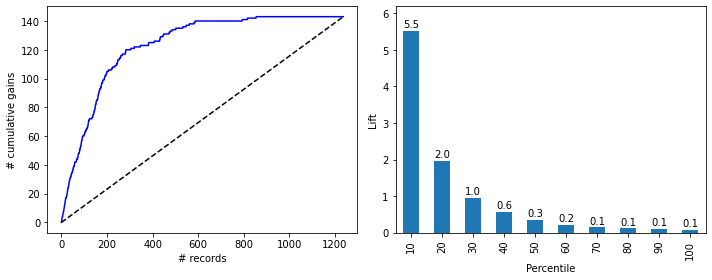

In [108]:
# Developing and displaying Gains chart and Lift chart. 

# Creating a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df = log_result_fs.sort_values(by=['p(1)'], ascending=False)

# Creating a data plot with two plots (ncols=2) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Using gainsChart() function, create Gains chart. 
gainsChart(df.Actual, ax=axes[0], color='Blue')

# Using liftChart() function, create decile-wise Lift chart. 
liftChart(df['p(1)'], title=False, ax=axes[1])
 
# Display the charts. 
plt.tight_layout()
plt.show()

# Backward Elimination 

In [109]:
X = bank_logreg_df.drop(columns=['y'])
y = bank_logreg_df['y']

# Partitioning data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

In [110]:
# Defining train_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def train_model(variables):
    model = LogisticRegression(max_iter=3000)
    model.fit(train_X[variables], train_y)
    return model

# Defining score_model() function used in Backward Elimination
# algorithm with backward_elimination() function. 
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

# Using backward_elimination() function to identify the
# best_model and best_variables. 
best_model_be, best_variables_be = backward_elimination(train_X.columns, 
                        train_model, score_model, verbose=True)

# Displaying best variables based on Backward Elimination algorithm. 
print()
print('Best Variables from Backward Elimination Algorithm')
print(best_variables_be)

Variables: age, job, marital, education, month, day_of_week, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, housing_yes, loan_yes, contact_telephone, poutcome_nonexistent, poutcome_success
Start: score=759.70
Step: score=759.70, remove None

Best Variables from Backward Elimination Algorithm
['age', 'job', 'marital', 'education', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'housing_yes', 'loan_yes', 'contact_telephone', 'poutcome_nonexistent', 'poutcome_success']


# Neural Networks

In [88]:
bank_neuralnet_df = bank_df

In [89]:
bank_neuralnet_df.dtypes

age                       int64
job                       int64
marital                   int64
education                 int64
month                     int64
day_of_week               int64
duration                  int64
campaign                  int64
pdays                     int64
previous                  int64
emp.var.rate            float64
cons.price.idx          float64
cons.conf.idx           float64
euribor3m               float64
nr.employed             float64
housing_yes               uint8
loan_yes                  uint8
contact_telephone         uint8
poutcome_nonexistent      uint8
poutcome_success          uint8
y                        object
dtype: object

In [90]:
# Creating Bank Dataset outcome and predictors to run neural network
# model.
outcome = 'y'
predictors = [c for c in bank_neuralnet_df.columns if c != outcome]

# Creating predictors and outcome variables.  
X = bank_neuralnet_df[predictors]
y = bank_neuralnet_df[outcome]



# Partitioning data into training (60% or 0.6) and validation(40% or 0.4)
# of the bank_neuralnet_df data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

#Scale the predictors to avoid effect of large values
sc_X = StandardScaler()
train_X_sc = sc_X.fit_transform(train_X)
valid_X_sc = sc_X.transform(valid_X)


train_X_sc_df = np.round(pd.DataFrame(train_X_sc), decimals=3)                            
train_X_sc_df.columns= predictors

# Use MLPCclassifier() function to train neural network model.
bank_neuralnet_clf = MLPClassifier(hidden_layer_sizes=(3), max_iter=5000,
                activation='logistic', solver='adam',random_state=1)
bank_neuralnet_clf.fit(train_X_sc, train_y)

# Displaying network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(bank_neuralnet_clf.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(bank_neuralnet_clf.coefs_)

Final Intercepts for Accidents Neural Network Model
[array([0.77243768, 0.83353224, 1.02440243]), array([0.18132938])]

Network Weights for Accidents Neural Network Model
[array([[-0.13304624, -0.01511244,  0.39853246],
       [-0.15255367, -0.2361824 , -0.06521191],
       [-0.13015562, -0.2240152 , -0.42182681],
       [-0.00391646, -0.00361862, -0.06194441],
       [ 0.10158209,  0.15940289, -0.17897677],
       [-0.05757416, -0.11580998, -0.06066899],
       [-2.4655213 , -2.24687324, -2.1856825 ],
       [-0.1642774 , -0.11982596,  0.33643621],
       [-0.80842883, -0.10244453, -1.27465407],
       [-0.12247545, -0.20330019,  0.46266929],
       [ 0.43120188,  0.52803577,  1.15861704],
       [-0.73762986, -0.39393505, -0.65995277],
       [-0.47259194, -0.49854102, -0.64694026],
       [ 0.58816876,  0.56078462,  0.64408643],
       [ 0.43757066,  0.56582146,  0.23143609],
       [-0.21480692,  0.00751062,  0.04119775],
       [-0.02173839, -0.16381731, -0.02458664],
       [ 0.7

In [91]:
# Making 'y' classification for validation set 
# using bank_neuralnet_clf

# Using bank_neuralnet_clf to classify 'y'
# for validation set.
bank_neuralnet_pred = bank_neuralnet_clf.predict(valid_X_sc)

# Predicting 'y' probabilities p(0), p(1),
# and p(2) for validation set.
bank_neuralnet_pred_prob = np.round(bank_neuralnet_clf.predict_proba(valid_X_sc), 
                          decimals=4)

# Creating data frame to display classification results for
# validation set. 
bank_neuralnet_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in bank_neuralnet_pred_prob],
                'p(1)': [p[1] for p in bank_neuralnet_pred_prob],
                'Classification': bank_neuralnet_pred})

print('Classification for Accidents Data for Validation Partition')
print(bank_neuralnet_pred_result.head(10))

Classification for Accidents Data for Validation Partition
     Actual    p(0)    p(1) Classification
134      no  0.4676  0.5324            yes
447      no  0.9915  0.0085             no
494     yes  0.4550  0.5450            yes
17       no  0.9921  0.0079             no
3097    yes  0.5548  0.4452             no
3010     no  0.9919  0.0081             no
820      no  0.9908  0.0092             no
2163     no  0.9912  0.0088             no
1981    yes  0.9397  0.0603             no
2174     no  0.9913  0.0087             no


In [96]:
# Confusion matrices for neural network model. 

# Identifying and displaying confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, bank_neuralnet_clf.predict(train_X_sc))

# Identifying and displaying confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, bank_neuralnet_clf.predict(valid_X_sc))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.9094)

       Prediction
Actual    0    1
     0 1574   53
     1  115  112

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.9094)

       Prediction
Actual    0    1
     0 1065   28
     1   84   59


In [93]:
# Identifying hidden layer best parameters using grid search cv. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilizing GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='adam', activation='logistic', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Displaying the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)


Best score:0.8776
Best parameter:  {'hidden_layer_sizes': 2}


In [94]:
# Using MLPCclassifier() function to train neural network model.
bank_neuralnet_grid = MLPClassifier(hidden_layer_sizes=(2), max_iter=10000,
                activation='logistic', solver='adam', random_state=1)
bank_neuralnet_grid.fit(train_X_sc, train_y)

# Displaying network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(bank_neuralnet_grid.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(bank_neuralnet_grid.coefs_)

Final Intercepts for Accidents Neural Network Model
[array([ 1.38028989, -1.30721341]), array([-1.60475537])]

Network Weights for Accidents Neural Network Model
[array([[ 0.20687581,  0.07996717],
       [-0.15874995,  0.19902704],
       [-0.27253892,  0.14884612],
       [-0.05123357, -0.05516972],
       [-0.0392835 , -0.18533666],
       [-0.03637235,  0.11358369],
       [-2.26691785,  2.52007599],
       [ 0.12940316,  0.16495476],
       [-1.09619821,  0.28710147],
       [ 0.19895001, -0.11855935],
       [ 1.06577538, -0.53740281],
       [-0.68988098,  0.67394346],
       [-0.57624075,  0.58700032],
       [ 0.37255297, -0.79232013],
       [ 0.48816105, -0.30291937],
       [-0.03549483,  0.13550685],
       [-0.06698684,  0.14077627],
       [ 0.8773041 , -0.69715511],
       [-0.2546979 ,  0.18994661],
       [-1.14551276,  0.22428437]]), array([[-2.55348766],
       [ 1.99691984]])]


In [95]:
# Confusion matrices for improved neural network model for banking dataset
# using grid search results. 

# Identifying and displaying confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, bank_neuralnet_grid.predict(train_X_sc))

# Identifying and displaying confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, bank_neuralnet_grid.predict(valid_X_sc))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.9110)

       Prediction
Actual    0    1
     0 1561   66
     1   99  128

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.9110)

       Prediction
Actual    0    1
     0 1052   41
     1   69   74
